In [43]:
import pandas as pd
import numpy as np

In [44]:
data=pd.read_csv("creditcard.csv")

In [45]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [46]:
print("Dataset Shape:\n(Samples, features)\n", data.shape)

Dataset Shape:
(Samples, features)
 (284807, 31)


In [47]:
from termcolor import colored as cl 
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [48]:
#checking for missing or null values in the data. So, that we can replace them if any.
data.isnull().sum().sum()

0

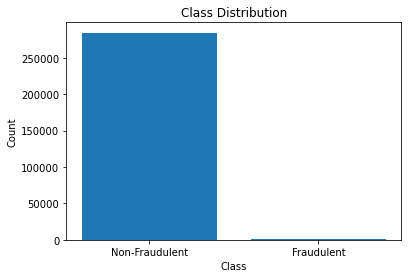

In [49]:
#from the bar plot we understand that data is so unbalnced with one class having high amount of data
import matplotlib.pyplot as plt
# Define the labels and corresponding counts
labels = ['Non-Fraudulent', 'Fraudulent']
counts = [len(data[data['Class'] == 0]), len(data[data['Class'] == 1])]
# Plot the bar chart
plt.bar(labels, counts)
# Set the title and axis labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


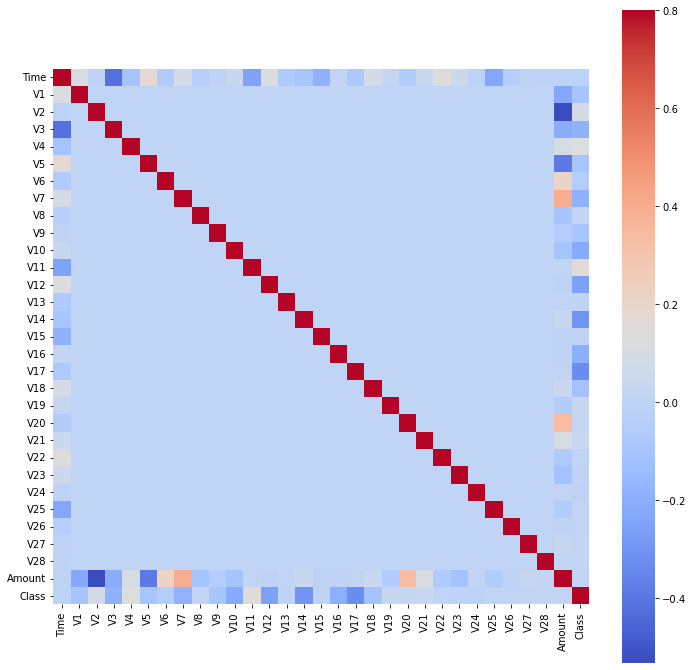

In [50]:
# Correlation matrix
import seaborn as sns
corrmat = data.corr()
fig = plt.figure(figsize = (12, 12))
sns.heatmap(corrmat, vmax = .8, square = True, cmap='coolwarm')
plt.show()


In [51]:
from sklearn.preprocessing import StandardScaler
#Data Transformation
print("Amount fields before applying Standard scaler:\n", data['Amount'][0:7])
data['normalized_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'], axis = 1)
print("Amount fields after applying Standard scaler:\n", data['normalized_amount'][0:7])

Amount fields before applying Standard scaler:
 0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
5      3.67
6      4.99
Name: Amount, dtype: float64
Amount fields after applying Standard scaler:
 0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
Name: normalized_amount, dtype: float64


In [52]:
data = data.drop(['Time'], axis = 1)

In [53]:
X = data.drop(['Class'], axis = 1).values
y = data['Class'].values

In [54]:
X.shape

(284807, 29)

In [55]:
y.shape

(284807,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score
#Build the model using Decision tree Classifier
print("Build Model DecisionTree")
decision_tree_classifier = DecisionTreeClassifier()
#Training the model based on training data
decision_tree_classifier.fit(X_train, y_train.ravel())
#Calculating Evaluation metrics
accuracy = decision_tree_classifier.score(X_test, y_test)
y_pred = decision_tree_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model DecisionTree
Accuracy:
 0.9991292379427544
Confusion matrix:
 [[71050    32]
 [   30    90]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.74      0.75      0.74       120

    accuracy                           1.00     71202
   macro avg       0.87      0.87      0.87     71202
weighted avg       1.00      1.00      1.00     71202

F1 score:
 0.743801652892562
Recall:
 0.75
AUC score:
 0.8747749078529024


In [58]:
print("Build Model SVM")
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train.ravel())
accuracy = svm_classifier.score(X_test, y_test)
y_pred = svm_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred, zero_division=1)
AUC = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('Classification report:\n', Classification_Report)
print('AUC score:\n', AUC)

Build Model SVM
Accuracy:
 0.9993539507317211
Confusion matrix:
 [[71076     6]
 [   40    80]]
F1 score:
 0.7766990291262136
Recall:
 0.6666666666666666
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.67      0.78       120

    accuracy                           1.00     71202
   macro avg       0.96      0.83      0.89     71202
weighted avg       1.00      1.00      1.00     71202

AUC score:
 0.8332911285557524


In [59]:
print("Build Model RandomForestClassifier")
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 50)
random_forest_classifier.fit(X_train, y_train.ravel())
accuracy = random_forest_classifier.score(X_test, y_test)
y_pred = random_forest_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred, zero_division=1)
AUC = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model RandomForestClassifier
Accuracy:
 0.9995084407741356
Confusion matrix:
 [[71075     7]
 [   28    92]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.77      0.84       120

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 score:
 0.8401826484018264
Recall:
 0.7666666666666667
AUC score:
 0.8832840944261557


In [60]:
print("Build Model KNeighborsClassifier")
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train.ravel())
accuracy = knn_classifier.score(X_test, y_test)
y_pred = knn_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred, zero_division=1)
AUC = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model KNeighborsClassifier
Accuracy:
 0.9994663071262043
Confusion matrix:
 [[71074     8]
 [   30    90]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.92      0.75      0.83       120

    accuracy                           1.00     71202
   macro avg       0.96      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202

F1 score:
 0.8256880733944955
Recall:
 0.75
AUC score:
 0.8749437269632255


In [61]:
print("Build Model Naive Bayes Classifier")
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train.ravel())
naive_bayes_classifier.fit(X_train, y_train.ravel())
accuracy = naive_bayes_classifier.score(X_test, y_test)
y_pred = naive_bayes_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred, zero_division=1)
AUC = roc_auc_score(y_test, y_pred)
# Print the results
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model Naive Bayes Classifier
Accuracy:
 0.9783994831605853
Confusion matrix:
 [[69564  1518]
 [   20   100]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.06      0.83      0.12       120

    accuracy                           0.98     71202
   macro avg       0.53      0.91      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1 score:
 0.11507479861910241
Recall:
 0.8333333333333334
AUC score:
 0.9059888579387188


# print("Build Model Naive  ")
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train.ravel())
logistic_regression_classifier.fit(X_train, y_train.ravel())
logistic_regression_classifier.fit(X_train, y_train.ravel())
accuracy = logistic_regression_classifier.score(X_test, y_test)
y_pred = logistic_regression_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred, zero_division=1)
aroc = roc_auc_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('AROC score:\n', aroc)

In [62]:
#pip install xgboost

In [63]:
print("Build Model XGBClassifier")
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train.ravel())
xgb.fit(X_train, y_train.ravel())
xgb.fit(X_train, y_train.ravel())
accuracy = xgb.score(X_test, y_test)
y_pred = xgb.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred, zero_division=1)
aroc = roc_auc_score(y_test, y_pred)
# Print the results
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model XGBClassifier
Accuracy:
 0.9995786635206876
Confusion matrix:
 [[71075     7]
 [   23    97]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.81      0.87       120

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 score:
 0.8660714285714286
Recall:
 0.8083333333333333
AUC score:
 0.9059888579387188


# Balancing the data
from imblearn.under_sampling import RandomUnderSampler
# Setting Parameters
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
# Check class balancing
print(pd.Series(y_rus).value_counts())
# Plot the new Class distribution
sns.countplot(y_rus);

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
#Build the model using Decision tree Classifier
#Training the model based on training data
print("Build Model DecisionTree")
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_rus, y_rus)
accuracy = decision_tree_classifier.score(X_test, y_test)
y_pred = decision_tree_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
Classification_Report = classification_report(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('AUC score:\n', AUC)

In [64]:
class_value = data['Class'].value_counts()
# Get the values for each class
non_fraud_transactions = class_value[0]
fraud_transactions = class_value[1]

# Print
print("Non-fraudulent Transactions: ", non_fraud_transactions)
print("fraudulent Transactions: ", fraud_transactions)

Non-fraudulent Transactions:  284315
fraudulent Transactions:  492


In [65]:
#Perform RANDOM UNDER SAMPLING
fraud_indices = np.array(data[data['Class'] == 1].index)
non_fraud_indices = data[data['Class'] == 0].index
random_non_fraud_indices = np.random.choice(non_fraud_indices, size=fraud_transactions, replace = False)
random_non_fraud_indices = np.array(random_non_fraud_indices)

In [66]:
# Get indices of fraudulent and non-fraudulent samples
fraud_indices = np.array(data[data['Class'] == 1].index)
non_fraud_indices = data[data['Class'] == 0].index

# Get a random sample of non-fraudulent samples
# The size of the random sample should be equal to the number of fraudulent samples
random_non_fraud_indices = np.random.choice(non_fraud_indices, size=fraud_transactions, replace=False)

# Convert the random sample to a numpy array
random_non_fraud_indices = np.array(random_non_fraud_indices)


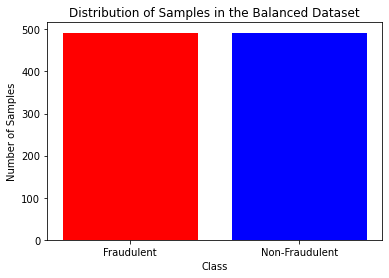

In [67]:
#Concatenate the both indices of fraud and non fraud
under_sample_indices = np.concatenate([fraud_indices, random_non_fraud_indices])

#Extracting all the features from whole data for under sample indices only
under_sample_data = data.iloc[under_sample_indices, :]

#Now, we have to divide the under sampling data to all features and target
X_random_under_sample = under_sample_data.drop(['Class'], axis = 1)
y_random_under_sample = under_sample_data[['Class']]

# Create a bar plot to show the distribution of samples
class_value = y_random_under_sample['Class'].value_counts()
fraud_value = class_value[1]
non_fraud_value = class_value[0]

labels = ['Fraudulent', 'Non-Fraudulent']
values = [fraud_value, non_fraud_value]


plt.bar(labels, values, color=['red', 'blue'])
plt.title('Distribution of Samples in the Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [68]:
#Now, we have to split the dataset to train and test datasets like before
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_random_under_sample, y_random_under_sample, test_size = 0.25, random_state = 0)

In [69]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
#Build the model using Decision tree Classifier
#Training the model based on training data
print("Build Model DecisionTree")
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_rus, y_train_rus)
accuracy = decision_tree_classifier.score(X_test_rus, y_test_rus)
y_pred = decision_tree_classifier.predict(X_test_rus)
confusion_mat = confusion_matrix(y_test_rus, y_pred)
Classification_Report = classification_report(y_test_rus, y_pred)
AUC = roc_auc_score(y_test_rus, y_pred)
f1 = f1_score(y_test_rus, y_pred)
recall = recall_score(y_test_rus, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model DecisionTree
Accuracy:
 0.8902439024390244
Confusion matrix:
 [[110  17]
 [ 10 109]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       127
           1       0.87      0.92      0.89       119

    accuracy                           0.89       246
   macro avg       0.89      0.89      0.89       246
weighted avg       0.89      0.89      0.89       246

F1 score:
 0.889795918367347
Recall:
 0.9159663865546218
AUC score:
 0.8910540594190433


In [71]:
#Build the model using Decision tree Classifier
#Training the model based on training dat
print("Build Model SVM")
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train_rus, y_train_rus)
accuracy = svm_classifier.score(X_test_rus, y_test_rus)
y_pred = svm_classifier.predict(X_test_rus)
confusion_mat = confusion_matrix(y_test_rus, y_pred)
Classification_Report = classification_report(y_test_rus, y_pred, zero_division=1)
AUC = roc_auc_score(y_test_rus, y_pred)
f1 = f1_score(y_test_rus, y_pred)
recall = recall_score(y_test_rus, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model SVM
Accuracy:
 0.9308943089430894
Confusion matrix:
 [[123   4]
 [ 13 106]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       127
           1       0.96      0.89      0.93       119

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246

F1 score:
 0.9257641921397379
Recall:
 0.8907563025210085
AUC score:
 0.9296301197644412


In [72]:
#Build the model using Decision tree Classifier
#Training the model based on training dat
print("Build Model RandomForestClassifier")
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 50)
random_forest_classifier.fit(X_train_rus, y_train_rus)
accuracy = random_forest_classifier.score(X_test_rus, y_test_rus)
y_pred = random_forest_classifier.predict(X_test_rus)
confusion_mat = confusion_matrix(y_test_rus, y_pred)
Classification_Report = classification_report(y_test_rus, y_pred)
AUC = roc_auc_score(y_test_rus, y_pred)
f1 = f1_score(y_test_rus, y_pred)
recall = recall_score(y_test_rus, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model RandomForestClassifier
Accuracy:
 0.943089430894309
Confusion matrix:
 [[121   6]
 [  8 111]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       127
           1       0.95      0.93      0.94       119

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

F1 score:
 0.9406779661016949
Recall:
 0.9327731092436975
AUC score:
 0.9427645073777542


In [73]:
#Build the model using Decision tree Classifier
#Training the model based on training dat
print("Build Model KNeighborsClassifier")
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train_rus, y_train_rus)
accuracy = knn_classifier.score(X_test_rus, y_test_rus)
y_pred = knn_classifier.predict(X_test_rus)
confusion_mat = confusion_matrix(y_test_rus, y_pred)
Classification_Report = classification_report(y_test_rus, y_pred)
AUC = roc_auc_score(y_test_rus, y_pred)
f1 = f1_score(y_test_rus, y_pred)
recall = recall_score(y_test_rus, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model KNeighborsClassifier
Accuracy:
 0.9308943089430894
Confusion matrix:
 [[125   2]
 [ 15 104]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       127
           1       0.98      0.87      0.92       119

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

F1 score:
 0.9244444444444444
Recall:
 0.8739495798319328
AUC score:
 0.9291007741679349


In [74]:
#Build the model using Decision tree Classifier
#Training the model based on training dat
print("Build Model Naive Bayes Classifier")
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_rus, y_train_rus)
accuracy = naive_bayes_classifier.score(X_test_rus, y_test_rus)
y_pred = naive_bayes_classifier.predict(X_test_rus)
confusion_mat = confusion_matrix(y_test_rus, y_pred)
Classification_Report = classification_report(y_test_rus, y_pred)
AUC = roc_auc_score(y_test_rus, y_pred)
f1 = f1_score(y_test_rus, y_pred)
recall = recall_score(y_test_rus, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model Naive Bayes Classifier
Accuracy:
 0.8902439024390244
Confusion matrix:
 [[118   9]
 [ 18 101]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       127
           1       0.92      0.85      0.88       119

    accuracy                           0.89       246
   macro avg       0.89      0.89      0.89       246
weighted avg       0.89      0.89      0.89       246

F1 score:
 0.8820960698689957
Recall:
 0.8487394957983193
AUC score:
 0.8889366770330179


In [75]:
#Build the model using Decision tree Classifier
#Training the model based on training dat
print("Build Model XGBClassifier")
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train_rus, y_train_rus)
accuracy = xgb.score(X_test_rus, y_test_rus)
y_pred = xgb.predict(X_test_rus)
confusion_mat = confusion_matrix(y_test_rus, y_pred)
Classification_Report = classification_report(y_test_rus, y_pred)
AUC = roc_auc_score(y_test_rus, y_pred)
f1 = f1_score(y_test_rus, y_pred)
recall = recall_score(y_test_rus, y_pred)
# Print the results
print('Accuracy:\n', accuracy)
print('Confusion matrix:\n', confusion_mat)
print('Classification report:\n', Classification_Report)
print('F1 score:\n', f1)
print('Recall:\n', recall)
print('AUC score:\n', AUC)

Build Model XGBClassifier
Accuracy:
 0.943089430894309
Confusion matrix:
 [[120   7]
 [  7 112]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       127
           1       0.94      0.94      0.94       119

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

F1 score:
 0.9411764705882353
Recall:
 0.9411764705882353
AUC score:
 0.9430291801760073


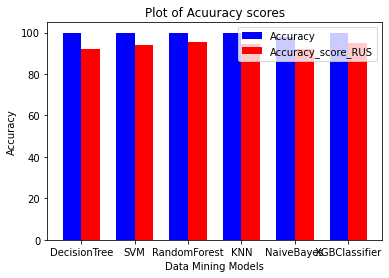

In [78]:
#Plot accuracy scores before and after RUS
import numpy as np
import matplotlib.pyplot as plt

Accuracy = [99.91, 99.93, 99.95, 99.94, 97.83, 99.95]
Accuracy_score_RUS =[92.27, 93.90, 95.52, 94.71, 91.86, 95.12]
models = ['DecisionTree','SVM', 'RandomForest','KNN', 'NaiveBayes', 'XGBClassifier']

bar_width = 0.35
r1 = np.arange(len(Accuracy))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots()
ax.bar(r1, Accuracy, width=bar_width, label='Accuracy', color='blue')
ax.bar(r2, Accuracy_score_RUS, width=bar_width, label='Accuracy_score_RUS', color='red')

ax.set_xlabel('Data Mining Models')
ax.set_ylabel('Accuracy')
ax.set_title('Plot of Acuuracy scores')
ax.set_xticks(r1+bar_width/2)
ax.set_xticklabels(models)
ax.legend()

plt.show()



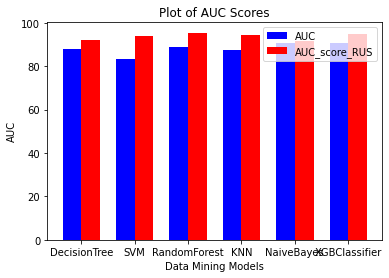

In [79]:
#Plot AUC scores before and after RUS
AUC_score = [87.89, 83.32, 88.74, 87.49, 90.5, 90.5]
AUC_score_RUS =[92.28, 93.75, 95.43, 94.59, 91.6, 95]
models = ['DecisionTree','SVM', 'RandomForest','KNN', 'NaiveBayes', 'XGBClassifier']

bar_width = 0.35
r1 = np.arange(len(AUC_score))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots()
ax.bar(r1, AUC_score, width=bar_width, label='AUC', color='blue')
ax.bar(r2, AUC_score_RUS, width=bar_width, label='AUC_score_RUS', color='red')

ax.set_xlabel('Data Mining Models')
ax.set_ylabel('AUC')
ax.set_title('Plot of AUC Scores')
ax.set_xticks(r1+bar_width/2)
ax.set_xticklabels(models)
ax.legend()

plt.show()